<a href="https://colab.research.google.com/github/muthuchelvi/Machine-language-/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# New Section

In [ ]:
Img_Size=224
Batch_size=32

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uurilgin/mybraintumor")

print("Path to dataset files:", path)

100%|██████████| 25.6M/25.6M [00:00<00:00, 149MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uurilgin/mybraintumor/versions/1


In [ ]:
train_generator=train_datagen.flow_from_directory("/root/.cache/kagglehub/datasets/uurilgin/mybraintumor/versions/1", target_size=(Img_Size,Img_Size), batch_size=Batch_size, class_mode="binary", subset="training" )

Found 914 images belonging to 1 classes.


In [ ]:
val_generator=train_datagen.flow_from_directory("/root/.cache/kagglehub/datasets/uurilgin/mybraintumor/versions/1",
target_size=(Img_Size,Img_Size),
batch_size=Batch_size,
class_mode="binary",subset="validation")

Found 228 images belonging to 1 classes.


In [ ]:
model=keras.Sequential([
    layers.Conv2D(32,
(3,3),activation="relu",input_shape=(Img_Size,Img_Size,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=Batch_size)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step - accuracy: 0.9249 - loss: 0.0925 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 134s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [ ]:
model.save("C:\\Users\\praka\\Desktop\\ML\\BrainTumor.h5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model= load_model("C:\\Users\\praka\\Desktop\\ML\\BrainTumor.h5")
print("Model Loaded")

Model Loaded


from google.colab import files
files.upload()   # upload kaggle.json


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving Y2390.jpg to Y2390.jpg


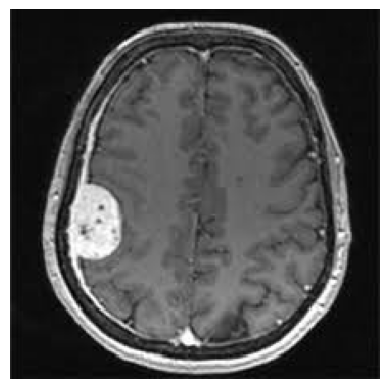

In [ ]:
test_image_path = "Y2390.jpg"
img = image.load_img(test_image_path, target_size=(224,224))
plt.imshow(img)
plt.axis('off')
plt.show()



In [ ]:
import os

os.listdir("dataset")  # Lists files inside the dataset folder


['brain_tumor_dataset']

In [ ]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset",   # path to your training images
    image_size=(128,128),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset",    # path to validation images
    image_size=(128,128),
    batch_size=32
)



Found 1142 files belonging to 1 classes.
Found 1142 files belonging to 1 classes.


In [ ]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array, axis=0)
img_array/=255.
print(img_array.shape)
(1, 224, 224, 3)
prediction=model.predict(img_array)
print(prediction)

(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
[[0.]]


In [ ]:
if prediction>0.5:print("you have brain tumor")
else:print("you dont have brain tumor")

you dont have brain tumor


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 35s 970ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 999ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 40s 986ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 34s 949ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch

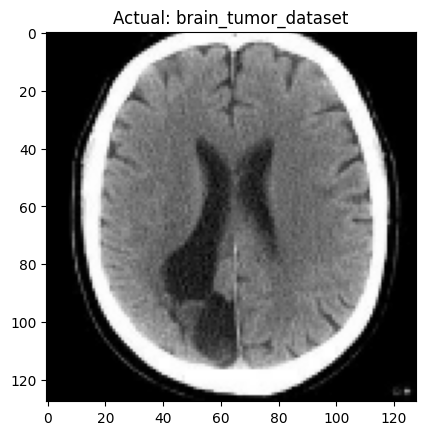

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted: brain_tumor_dataset


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


In [ ]:
# Example prediction
import numpy as np
import matplotlib.pyplot as plt

for images, labels in val_ds.take(1):
    sample_image = images[0].numpy().astype("uint8")
    sample_label = labels[0].numpy()

    plt.imshow(sample_image)
    plt.title(f"Actual: {val_ds.class_names[sample_label]}")
    plt.show()

    prediction = model.predict(images[:1])
    predicted_class = val_ds.class_names[np.argmax(prediction[0])]
    print("Predicted:", predicted_class)


In [ ]:
model.save("my_cnn_model.h5")


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("my_cnn_model.h5")


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("my_cnn_model.h5")


In [ ]:
# Evaluate on validation/test data
val_loss, val_acc = model.evaluate(val_ds)
print("Validation Accuracy:", val_acc)


36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Validation Accuracy: 0.0


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("my_cnn_model.h5")
